In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
##the problem is to classify the custemors from two different channels, build Xgboost classifier using Kfold-CV

In [3]:
df = pd.read_csv(r"C:\Users\E1\Desktop\Wholesale customers data.csv")

In [4]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
df.shape

(440, 8)

In [6]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [8]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [9]:
df["Channel"].value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

In [10]:
df["Region"].value_counts()

Region
3    316
1     77
2     47
Name: count, dtype: int64

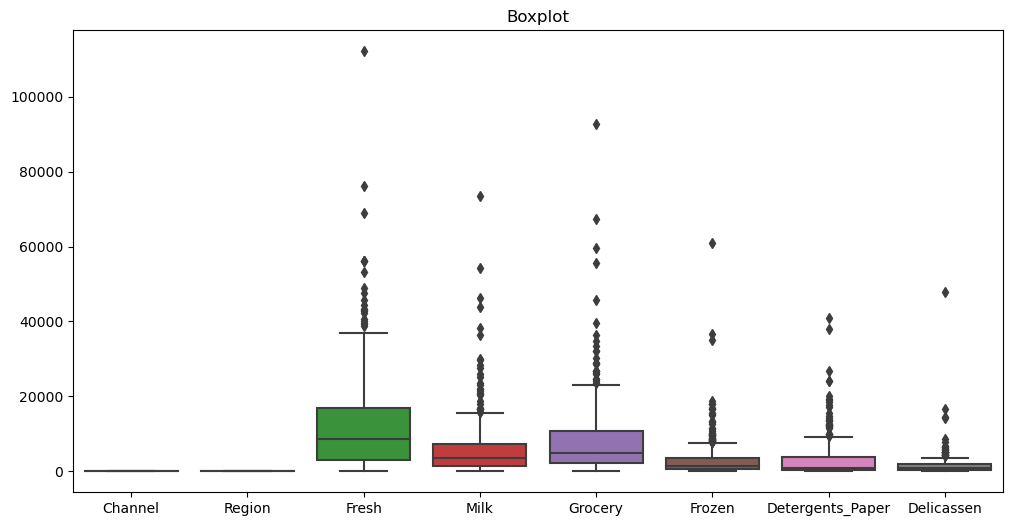

In [11]:
#To check outliers
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot")
plt.show()

In [12]:
#Preprocessing
df = pd.get_dummies(df, columns=['Region'], dtype= "int") 

In [13]:
df.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3
0,2,12669,9656,7561,214,2674,1338,0,0,1
1,2,7057,9810,9568,1762,3293,1776,0,0,1
2,2,6353,8808,7684,2405,3516,7844,0,0,1
3,1,13265,1196,4221,6404,507,1788,0,0,1
4,2,22615,5410,7198,3915,1777,5185,0,0,1


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score




In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [20]:
X = df.drop(columns=['Channel'])  
y = df['Channel'] 

In [21]:
RF = RandomForestClassifier()

In [22]:
k_folds = 10

accuracy_scores = cross_val_score(RF, X, y, cv=k_folds)

mean_accuracy = accuracy_scores.mean()
print(accuracy_scores)
print(mean_accuracy)




[0.86363636 0.97727273 0.95454545 0.88636364 0.90909091 0.95454545
 0.90909091 0.93181818 0.97727273 0.79545455]
0.9159090909090908
